# Section 3.5 — Statistical design and error analysis

This notebook contains the code examples from [Section 3.5 Statistical design and error analysis]() of the **No Bullshit Guide to Statistics**.

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Plot helper functions
from plot_helpers import plot_pdf
from plot_helpers import savefigure

In [3]:
# Figures setup
plt.clf()  # needed otherwise `sns.set_theme` doesn't work
from plot_helpers import RCPARAMS
RCPARAMS.update({'figure.figsize': (10, 3)})   # good for screen
# RCPARAMS.update({'figure.figsize': (5, 1.6)})  # good for print
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc=RCPARAMS,
)

# Useful colors
snspal = sns.color_palette()
blue, orange, purple = snspal[0], snspal[1], snspal[4]

# High-resolution please
%config InlineBackend.figure_format = 'retina'

# Where to store figures
DESTDIR = "figures/stats/design"

<Figure size 640x480 with 0 Axes>

In [4]:
# set random seed for repeatability
np.random.seed(42)

In [5]:
#######################################################

## Definitions

## Hypothesis testing as a decision rule

## Statistical design

In [6]:
# FIGURE

d_small = 0.20
d_medium = 0.50
d_large = 0.80



## Example 1: detect kombuncha volume deviation from theory

In [7]:
from statsmodels.stats.power import tt_solve_power

min_delta = 4
std_pop = 10
d = min_delta / std_pop

n = tt_solve_power(effect_size=d, nobs=None, alpha=0.05, power=0.8, alternative='two-sided')
n

51.009448579637365

In [8]:
n = int(n)
n

51

In [9]:
#######################################################
kombuchapop = pd.read_csv("../datasets/kombuchapop.csv")
batch55pop = kombuchapop[kombuchapop["batch"]==55]
kpop55 = batch55pop["volume"]

In [10]:
np.random.seed(42)
ksample55 = kpop55.sample(n)
ksample55.values

array([ 986.93,  997.65,  999.11,  994.12, 1004.86, 1012.  ,  988.35,
       1000.79, 1012.09,  988.39,  985.64,  994.23,  990.63, 1011.05,
       1008.73, 1007.68,  987.89, 1002.74,  996.04,  986.46, 1005.77,
       1024.76,  986.84,  986.43,  998.54, 1006.27,  995.14,  999.45,
       1006.04, 1006.13, 1011.93, 1000.7 , 1012.77,  994.04,  996.23,
        987.79,  977.65, 1006.07,  995.5 , 1012.98,  980.8 ,  976.5 ,
        988.78,  989.33, 1012.49, 1004.41,  997.59, 1005.93, 1008.5 ,
       1008.73,  988.63])

In [11]:
from stats_helpers import simulation_test_mean

simulation_test_mean(ksample55, mu0=1000, sigma0=10)

0.3211

In [12]:
from stats_helpers import ttest_mean

ttest_mean(ksample55, mu0=1000)

0.3485870547277571

## Example 2: comparison of East vs. West electricity prices 

In [13]:
eprices = pd.read_csv("../datasets/eprices.csv")

In [14]:
eprices.groupby("end").describe()

price                                               
     count      mean       std  min  25%  50%   75%   max
end                                                      
East   9.0  6.155556  0.877655  4.8  5.5  6.3   6.5   7.7
West   9.0  9.155556  1.562139  6.8  8.3  8.6  10.0  11.8

In [15]:
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import ttest_power

Delta_min = 1
std_guess = 1

d = Delta_min / std_guess 

# Calculate the power of a t-test for two independent samples
TTestIndPower().power(effect_size=d, nobs1=9, alpha=0.05, ratio=1, alternative='two-sided')

0.5133625312934842

In [16]:
help(TTestIndPower().power)

Help on method power in module statsmodels.stats.power:

power(effect_size, nobs1, alpha, ratio=1, df=None, alternative='two-sided') method of statsmodels.stats.power.TTestIndPower instance
    Calculate the power of a t-test for two independent sample
    
    Parameters
    ----------
    effect_size : float
        standardized effect size, difference between the two means divided
        by the standard deviation. `effect_size` has to be positive.
    nobs1 : int or float
        number of observations of sample 1. The number of observations of
        sample two is ratio times the size of sample 1,
        i.e. ``nobs2 = nobs1 * ratio``
    alpha : float in interval (0,1)
        significance level, e.g. 0.05, is the probability of a type I
        error, that is wrong rejections if the Null Hypothesis is true.
    ratio : float
        ratio of the number of observations in sample 2 relative to
        sample 1. see description of nobs1
        The default for ratio is 1; to solv

## Explanations

### Probability models for NHST

### Unique value proposition of NHST

### One-sided and two-sided rejection regions

Saved figure to figures/stats/design/panel_rejection_regions_left_twotailed_right.pdf
Saved figure to figures/stats/design/panel_rejection_regions_left_twotailed_right.png


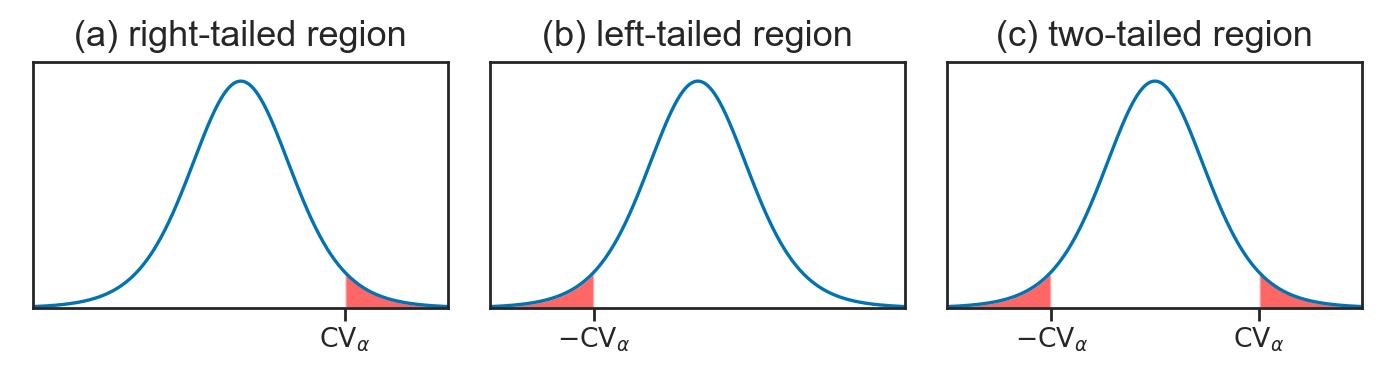

In [17]:
filename = os.path.join(DESTDIR, "panel_rejection_regions_left_twotailed_right.pdf")
    
from scipy.stats import t as tdist
rvT = tdist(9)

xs = np.linspace(-4, 4, 1000)
ys = rvT.pdf(xs)

with plt.rc_context({"figure.figsize":(7,2)}), sns.axes_style("ticks"):
    fig, (ax3, ax1, ax2) = plt.subplots(1,3)

    # RIGHT
    title = '(a) right-tailed region'
    ax3.set_title(title, fontsize=13)#, y=-0.26)
    sns.lineplot(x=xs, y=ys, ax=ax3)
    ax3.set_xlim(-4, 4)
    ax3.set_ylim(0, 0.42)
    ax3.set_xticks([2])
    ax3.set_xticklabels([])
    ax3.set_yticks([])

    # highlight the right tail
    mask = (xs > 2)
    ax3.fill_between(xs[mask], y1=ys[mask], alpha=0.6, facecolor="red")
    ax3.text(2, -0.03, r"$\mathrm{CV}_{\alpha}$", verticalalignment="top", horizontalalignment="center")


    # LEFT
    title = '(b) left-tailed region'
    ax1.set_title(title, fontsize=13) #, y=-0.26)
    sns.lineplot(x=xs, y=ys, ax=ax1)
    ax1.set_xlim(-4, 4)
    ax1.set_ylim(0, 0.42)
    ax1.set_xticks([-2])
    ax1.set_xticklabels([])
    ax1.set_yticks([])

    # highlight the left tail
    mask = (xs < -2)
    ax1.fill_between(xs[mask], y1=ys[mask], alpha=0.6, facecolor="red")
    ax1.text(-2, -0.03, r"$-\mathrm{CV}_{\alpha}$", verticalalignment="top", horizontalalignment="center")


    # TWO-TAILED
    title = '(c) two-tailed region'
    ax2.set_title(title, fontsize=13)#, y=-0.26)
    sns.lineplot(x=xs, y=ys, ax=ax2)
    ax2.set_xlim(-4, 4)
    ax2.set_ylim(0, 0.42)
    ax2.set_xticks([-2,2])
    ax2.set_xticklabels([])
    ax2.set_yticks([])

    # highlight the left and right tails
    mask = (xs < -2)
    ax2.fill_between(xs[mask], y1=ys[mask], alpha=0.6, facecolor="red")
    ax2.text(-2, -0.03, r"$-\mathrm{CV}_{\alpha}$", verticalalignment="top", horizontalalignment="center")
    mask = (xs > 2)
    ax2.fill_between(xs[mask], y1=ys[mask], alpha=0.6, facecolor="red")
    ax2.text(2, -0.03, r"$\mathrm{CV}_{\alpha}$", verticalalignment="top", horizontalalignment="center")


savefigure(fig, filename)

### Statistical design calculations

#### Sample size calculation

In [18]:
import pingouin as pg
from statsmodels.stats import power

# deisng parameters  
EFFECT_SIZE = 0.5
ALPHA = 0.05 
POWER = 0.8

# using statsmodels
power_analysis = power.TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=EFFECT_SIZE, 
                                         power=POWER, 
                                         alpha=ALPHA)

print(f'Required sample size (statsmodels): {sample_size:.0f}')

Required sample size (statsmodels): 64


In [19]:
# using pingouin
sample_size = pg.power_ttest(d=EFFECT_SIZE, 
                             alpha=ALPHA, 
                             power=POWER, 
                             n=None)

print(f'Required sample size (pingouin): {sample_size:.0f}')

Required sample size (pingouin): 64


In [20]:
from statsmodels.stats.power import tt_ind_solve_power

mean_diff, sd_diff = 0.5, 0.5
std_effect_size = mean_diff / sd_diff

n = tt_ind_solve_power(effect_size=std_effect_size, alpha=0.05, power=0.8, ratio=1, alternative='two-sided')
print('Number in *each* group: {:.5f}'.format(n))

Number in *each* group: 16.71472


In [21]:
from statsmodels.stats.power import tt_solve_power

min_delta = 4
std_pop = 10
d = min_delta / std_pop

tt_solve_power(effect_size=d, nobs=None, alpha=0.05, power=0.8, alternative='two-sided')

51.009448579637365

#### Understanding the design formula

## Discussion

### Different types of power

### Different types of effect size size

### Limitations of NHST

### Perils of the NHST procedure


## Exercises

## Links